In [1]:
import pandas as pd
from keras.utils import to_categorical
import numpy as np

labels = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/activity_labels.txt", header=None, sep="\s+")

X_train = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt", header=None, sep="\s+")
y_train = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt", header=None)
X_test_val = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt", header=None, sep="\s+")
y_test_val = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt", header=None)

X_test = X_test_val[0:round(0.9*X_test_val.shape[0])] 
X_val = X_test_val[round(0.9*X_test_val.shape[0]):] 
y_test = y_test_val[0:round(0.9*y_test_val.shape[0])] 
y_val = y_test_val[round(0.9*y_test_val.shape[0]):] 

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
y_val = to_categorical(y_val)

X_train.shape, y_train.shape, X_test.shape, y_test.shape, labels.shape

((7352, 561, 1), (7352, 7), (2652, 561), (2652, 1), (6, 2))

In [2]:
from keras import Sequential
from keras.layers import *
from keras.optimizers import *
import keras

modelo = Sequential()
modelo.add(Bidirectional(LSTM(92, return_sequences=True)))
modelo.add(Dropout(0.3227))
modelo.add(Bidirectional(LSTM(18)))
modelo.add(Dropout(0.4576))
modelo.add(Dense(7, activation="sigmoid"))

modelo.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy", "Precision", "Recall"])

In [3]:
historico = modelo.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_val, y_val))

Epoch 1/20
736/736 [==============================] - 697s 928ms/step - loss: 0.4301 - accuracy: 0.2330 - precision: 0.2402 - recall: 0.0578 - val_loss: 0.3508 - val_accuracy: 0.2915 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
736/736 [==============================] - 1679s 2s/step - loss: 0.3483 - accuracy: 0.3448 - precision: 0.3575 - recall: 0.1393 - val_loss: 0.3114 - val_accuracy: 0.3831 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
736/736 [==============================] - 687s 928ms/step - loss: 0.3302 - accuracy: 0.3670 - precision: 0.3762 - recall: 0.1715 - val_loss: 0.3014 - val_accuracy: 0.3492 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
736/736 [==============================] - 552s 749ms/step - loss: 0.3216 - accuracy: 0.3844 - precision: 0.4062 - recall: 0.2010 - val_loss: 0.4023 - val_accuracy: 0.1492 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
736/736 [==============================] - 508s

In [4]:
_, precisao, precision, recall = modelo.evaluate(X_test, y_test_cat)
f1_score = (2 * precision * recall) / (precision + recall)
print(f"Precisão do modelo: {precisao*100} %")
print(f"Precision do modelo: {precision*100} %")
print(f"Recall do modelo: {recall*100} %")
print(f"F1-Score do modelo: {f1_score*100} %")

83/83 [==============================] - 32s 388ms/step - loss: 0.1789 - accuracy: 0.7353 - precision: 0.8105 - recall: 0.6033
Precisão do modelo: 73.52941036224365 %
Precision do modelo: 81.05369806289673 %
Recall do modelo: 60.33182740211487 %
F1-Score do modelo: 69.17423414809129 %


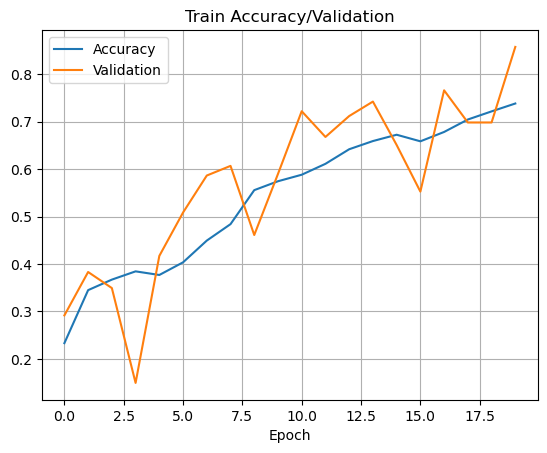

In [5]:
import matplotlib.pyplot as plt
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

plt.plot(historico.history["accuracy"])
plt.plot(historico.history["val_accuracy"])
plt.grid()
plt.title("Train Accuracy/Validation")
plt.legend(["Accuracy", "Validation"])
plt.xlabel("Epoch")
plt.savefig("images/BiLSTM Bayesian Optimization - Train Accuracy_Validation.pdf")

83/83 [==============================] - 37s 396ms/step


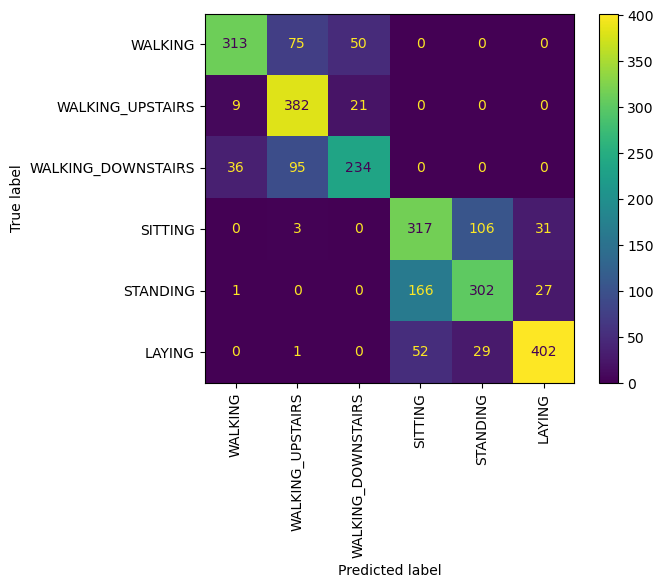

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_previsto = modelo.predict(X_test)
y_previsto = [np.argmax(y) for y in y_previsto]

cm = confusion_matrix(y_test, y_previsto)
display = ConfusionMatrixDisplay(cm, display_labels=labels[1])
display.plot(xticks_rotation="vertical")
display.figure_.savefig("images/BiLSTM Bayesian Optimization - Confusion Matrix.pdf", bbox_inches="tight")